## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Variables for camera calibration using chessboard images

CHESSBOARD_SHAPE = (9,6)
CHESSBOARD_IMAGES = glob.glob("./camera_cal/*.jpg")

In [54]:
# Drawing and saving the chessboard images with corners detected

objp = np.zeros((CHESSBOARD_SHAPE[0]*CHESSBOARD_SHAPE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_SHAPE[0], 0:CHESSBOARD_SHAPE[1]].T.reshape(-1,2)

obj_points = []
img_points = []

corner_not_found_images = []
for image in CHESSBOARD_IMAGES:
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SHAPE, None)
    if ret:
        obj_points.append(objp)
        img_points.append(corners.reshape((CHESSBOARD_SHAPE[0]*CHESSBOARD_SHAPE[1],2)))
        
        cv2.drawChessboardCorners(img, CHESSBOARD_SHAPE, corners, ret)
        imageName = image.split("\\")[-1]
        print("Writing Image: ./output_images/chessboardCorners/"+imageName)
        cv2.imwrite("./output_images/chessboardCorners/"+imageName, img)
    else:
        print("Unable to find corners for " + image)
        corner_not_found_images.append(image)

Unable to find corners for ./camera_cal\calibration1.jpg
Writing Image: ./chessboardCorners/calibration10.jpg
Writing Image: ./chessboardCorners/calibration11.jpg
Writing Image: ./chessboardCorners/calibration12.jpg
Writing Image: ./chessboardCorners/calibration13.jpg
Writing Image: ./chessboardCorners/calibration14.jpg
Writing Image: ./chessboardCorners/calibration15.jpg
Writing Image: ./chessboardCorners/calibration16.jpg
Writing Image: ./chessboardCorners/calibration17.jpg
Writing Image: ./chessboardCorners/calibration18.jpg
Writing Image: ./chessboardCorners/calibration19.jpg
Writing Image: ./chessboardCorners/calibration2.jpg
Writing Image: ./chessboardCorners/calibration20.jpg
Writing Image: ./chessboardCorners/calibration3.jpg
Unable to find corners for ./camera_cal\calibration4.jpg
Unable to find corners for ./camera_cal\calibration5.jpg
Writing Image: ./chessboardCorners/calibration6.jpg
Writing Image: ./chessboardCorners/calibration7.jpg
Writing Image: ./chessboardCorners/cal

In [50]:
#Image 1 got with : CHESSBOARD_SHAPE = (9,5)
#Image 4 got with : CHESSBOARD_SHAPE = (6,5)
#Image 5 got with : CHESSBOARD_SHAPE = (7,6)

CHESSBOARD_SHAPE = (7,6)
image = "./camera_cal\calibration5.jpg"
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SHAPE, None)
if ret:
    cv2.drawChessboardCorners(img, CHESSBOARD_SHAPE, corners, ret)
    imageName = image.split("\\")[-1]
    print("Writing Image: ./output_images/chessboardCorners/"+imageName)
    cv2.imwrite("./output_images/chessboardCorners/"+imageName, img)
else:
    print("Unable to find corners for " + image)
    

Writing Image: ./chessboardCorners/calibration5.jpg


In [43]:
# Calibrating the camera based on the picked object and image points

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

Text(0.5,1,'Undistorted Image')

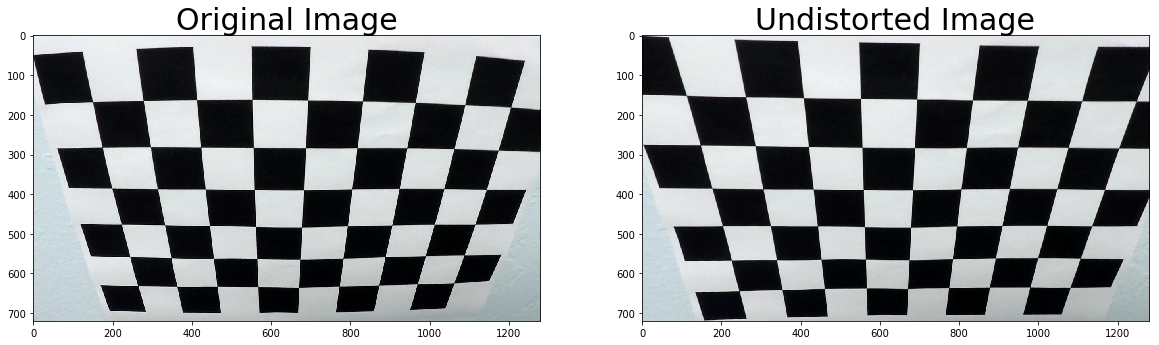

In [44]:
# Showing an undistorted image

img = cv2.imread('./camera_cal/calibration2.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [46]:
# Saving all images with undistortion 
for image in CHESSBOARD_IMAGES:
    img = cv2.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    imageName = image.split("\\")[-1]
    print("Writing Image: ./output_images/undistortedImages/"+imageName)
    cv2.imwrite("./output_images/undistortedImages/"+imageName, dst)

Writing Image: ./undistortedImages/calibration1.jpg
Writing Image: ./undistortedImages/calibration10.jpg
Writing Image: ./undistortedImages/calibration11.jpg
Writing Image: ./undistortedImages/calibration12.jpg
Writing Image: ./undistortedImages/calibration13.jpg
Writing Image: ./undistortedImages/calibration14.jpg
Writing Image: ./undistortedImages/calibration15.jpg
Writing Image: ./undistortedImages/calibration16.jpg
Writing Image: ./undistortedImages/calibration17.jpg
Writing Image: ./undistortedImages/calibration18.jpg
Writing Image: ./undistortedImages/calibration19.jpg
Writing Image: ./undistortedImages/calibration2.jpg
Writing Image: ./undistortedImages/calibration20.jpg
Writing Image: ./undistortedImages/calibration3.jpg
Writing Image: ./undistortedImages/calibration4.jpg
Writing Image: ./undistortedImages/calibration5.jpg
Writing Image: ./undistortedImages/calibration6.jpg
Writing Image: ./undistortedImages/calibration7.jpg
Writing Image: ./undistortedImages/calibration8.jpg
W

In [63]:
# Checking for Perpective transform
CHESSBOARD_SHAPE = (9,6)
images = glob.glob("./output_images/undistortedImages/*.jpg")
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SHAPE)
    if ret:
        offset = 100
        img_size = (img.shape[1], img.shape[0])
        src = np.float32([corners[0], corners[CHESSBOARD_SHAPE[0]-1], corners[-1], corners[-CHESSBOARD_SHAPE[0]]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(img, M, img_size)
        imageName = image.split("\\")[-1]
        print("Writing Image: ./output_images/perspectiveTranformedImages/"+imageName)
        cv2.imwrite("./output_images/perspectiveTranformedImages/"+imageName, warped)

Writing Image: ./output_images/perspectiveTranformedImages/calibration1.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration10.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration11.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration12.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration13.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration14.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration15.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration16.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration17.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration18.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration19.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration2.jpg
Writing Image: ./output_images/perspectiveTranformedImages/calibration20.jpg
W

## Second, I'll apply distortion correction to raw images

In [57]:
testImages = glob.glob("./test_images/*.jpg")
for image in testImages:
    img = cv2.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    imageName = image.split("\\")[-1]
    print("Writing Image: ./output_images/undistortedTestImages/"+imageName)
    cv2.imwrite("./output_images/undistortedTestImages/"+imageName, dst)

Writing Image: ./output_images/undistortedTestImages/straight_lines1.jpg
Writing Image: ./output_images/undistortedTestImages/straight_lines2.jpg
Writing Image: ./output_images/undistortedTestImages/test1.jpg
Writing Image: ./output_images/undistortedTestImages/test2.jpg
Writing Image: ./output_images/undistortedTestImages/test3.jpg
Writing Image: ./output_images/undistortedTestImages/test4.jpg
Writing Image: ./output_images/undistortedTestImages/test5.jpg
Writing Image: ./output_images/undistortedTestImages/test6.jpg


## Third, I'll apply color and gradient binary image

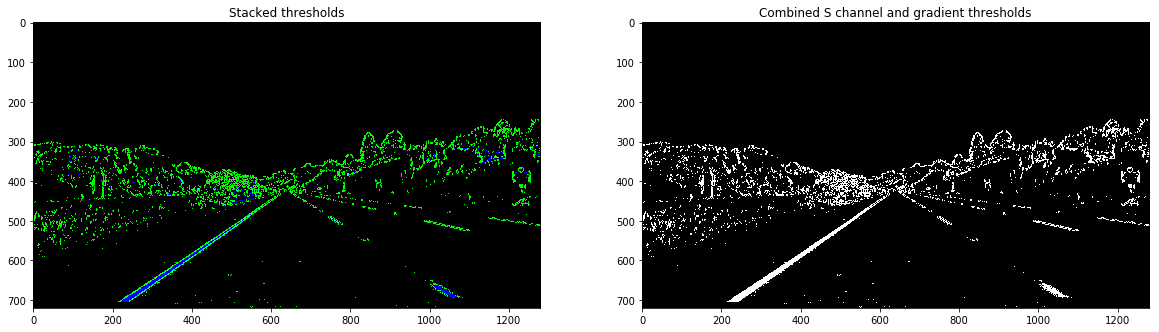

In [2]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
img = cv2.imread("./output_images/undistortedTestImages/straight_lines1.jpg")
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')


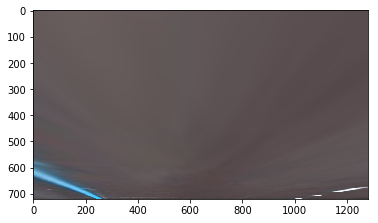

In [4]:
img_size = (img.shape[1], img.shape[0])
src = np.float32([[200,720], [620, 450], [630, 450], [1100, 720]])
dst = np.float32([[250,720], [250, 0], [1000, 0], [1000, 720]])
M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(img, M, img_size)
plt.imshow(warped)
plt.show()